In [17]:
import pandas as pd
import numpy as np

file_dataset = '../data/raw/cryptocurrencypricehistory/bitcoin_dataset.csv'
file_price = '../data/raw/cryptocurrencypricehistory/bitcoin_price.csv'
nrows = None # limit of rows to make preview

Loading data.

In [18]:
dataset = pd.read_csv(file_dataset,
           nrows=nrows,
            index_col=0,
            parse_dates=True)

price = pd.read_csv(file_price,
           nrows=nrows,
            index_col=0,
            dtype={'Volume':'string','Market Cap':'string'},
            thousands=',',
            na_values='-',
            parse_dates=True)

In [19]:
dataset.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,1584.000000,1.584000e+03,1.584000e+03,1.106000e+03,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1.584000e+03,...,1.584000e+03,1584.000000,1584.000000,1584.000000,1.584000e+03,1584.000000,1584.000000,1.584000e+03,1.584000e+03,1.584000e+03
mean,334.095935,9.858289e+06,5.045619e+09,7.163810e+06,25575.157921,0.275350,0.332702,524.398118,6.325609,5.922701e+05,...,1.936839e+03,9.991641,146279.104167,79702.557449,4.995044e+07,73023.962121,48678.102273,1.341287e+06,1.754802e+05,8.198947e+07
std,609.052564,5.170361e+06,9.932860e+09,1.825481e+07,35584.788312,0.323961,0.803367,624.657294,5.235022,1.311404e+06,...,4.483039e+04,12.749557,175945.983749,93616.287421,6.764581e+07,93160.749994,62017.952608,2.349160e+06,2.430975e+05,1.749650e+08
min,0.000000,5.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.897500,5.609512e+06,4.942691e+06,0.000000e+00,10.000000,0.004050,0.000000,12.000000,0.000000,4.656278e-01,...,1.089992e+00,2.015895,2829.000000,2046.750000,3.124270e+05,2046.750000,1539.500000,1.733491e+05,5.297075e+04,4.475075e+04
50%,97.235000,1.111709e+07,1.105880e+09,2.695221e+05,7364.000000,0.133423,0.000000,287.500000,7.400000,7.760397e+01,...,2.571138e+00,6.592404,53019.000000,49466.000000,1.725231e+07,24052.500000,22898.000000,8.295208e+05,1.493515e+05,1.516898e+07
75%,446.337500,1.435121e+07,6.437710e+09,6.763820e+06,38520.750000,0.446481,0.000000,792.000000,9.316667,3.738849e+05,...,6.787051e+00,10.758279,237152.500000,115646.250000,7.468435e+07,108932.750000,61813.500000,1.801741e+06,2.449880e+05,8.279745e+07
max,4748.255000,1.654439e+07,7.851738e+10,1.984916e+08,131365.560971,0.998177,5.000000,2235.977273,47.733333,8.215055e+06,...,1.570000e+06,90.202095,687290.000000,367710.000000,2.520994e+08,354151.000000,256495.000000,4.599222e+07,5.313161e+06,1.422580e+09


In [20]:
price.describe()

,Open,High,Low,Close
count,1592.000000,1592.000000,1592.000000,1592.000000
mean,658.283649,676.271727,641.050616,660.837795
std,723.653014,749.473657,699.635365,729.447612
min,68.500000,74.560000,65.530000,68.430000
25%,258.350000,263.930000,253.177500,258.592500
50%,444.885000,450.605000,437.180000,444.705000
75%,680.187500,703.960000,660.775000,682.142500
max,4901.420000,4975.040000,4678.530000,4892.010000


We observe that dataset has gabs on price. We try to combine with price file.
As is unkonwn witch is the price of reference we try Close price because it seem the most similar of each.

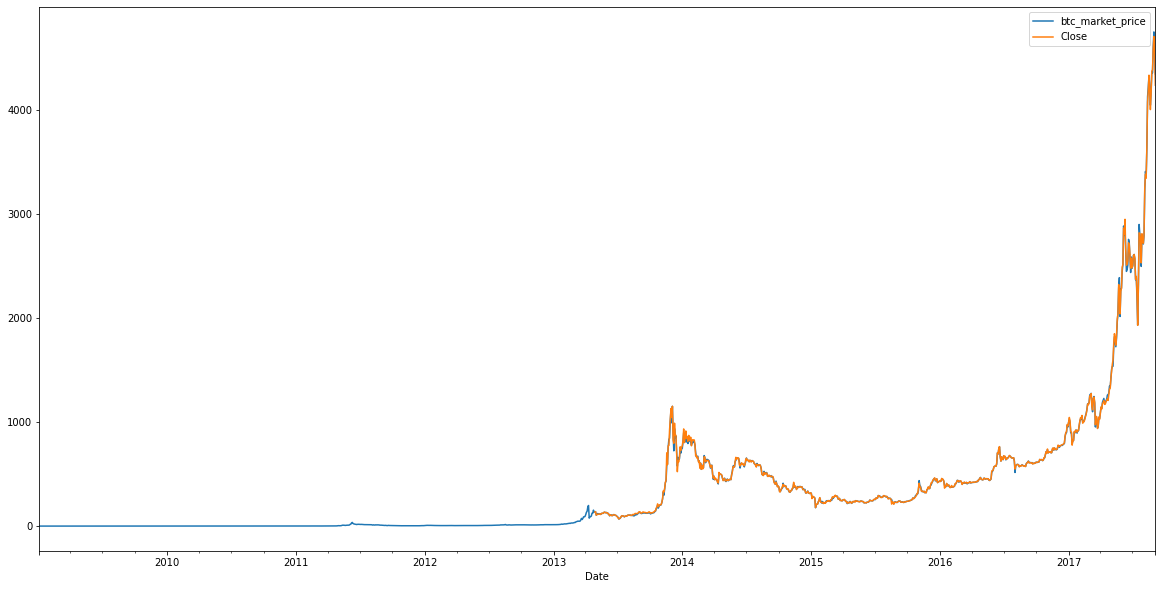

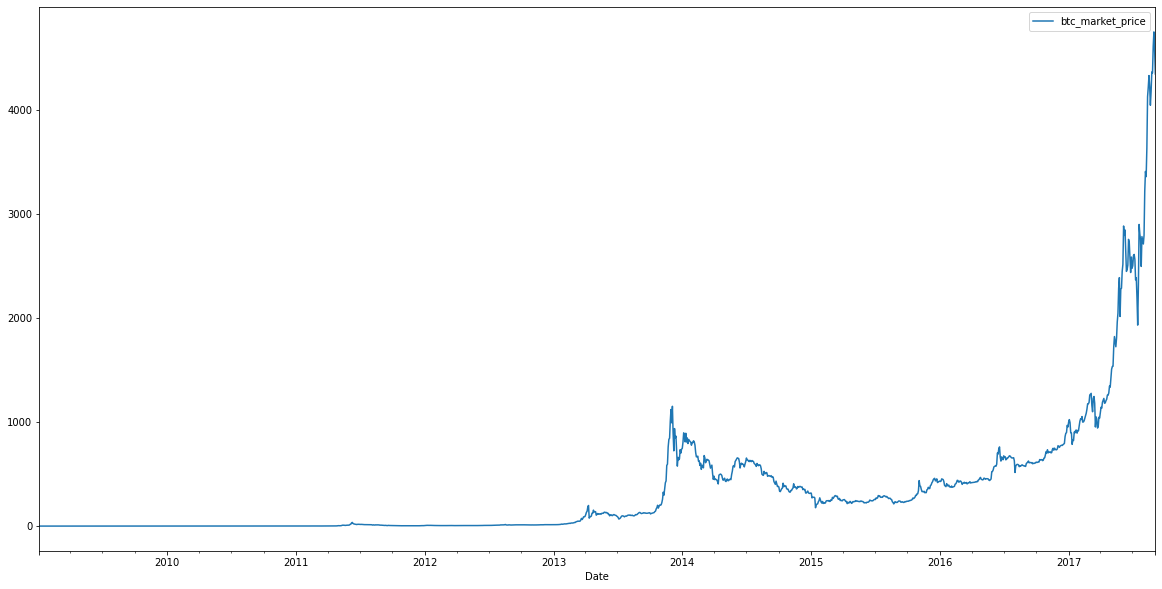

In [21]:
join  = dataset.join(price['Close'])

join.plot.line( y=['btc_market_price','Close'], figsize=(20,10))

join['btc_market_price'] = join.apply( lambda row: row['btc_market_price'] if (row['btc_market_price']!=0 or pd.isnull(row['Close'])) else row['Close'], axis=1)

join.drop(['Close'],axis=1)
join.plot.line( y=['btc_market_price'], figsize=(20,10))

dataset['btc_market_price'] = join['btc_market_price']


Market capital alse have some gaps.
We e cang get from prices file but this is en other scale, for this we need to divide for 1M.


In [22]:
price['Market Cap'] = price['Market Cap'].apply(lambda x :  int(x.replace(',',''))/1000000 if isinstance(x, str) else 0 )

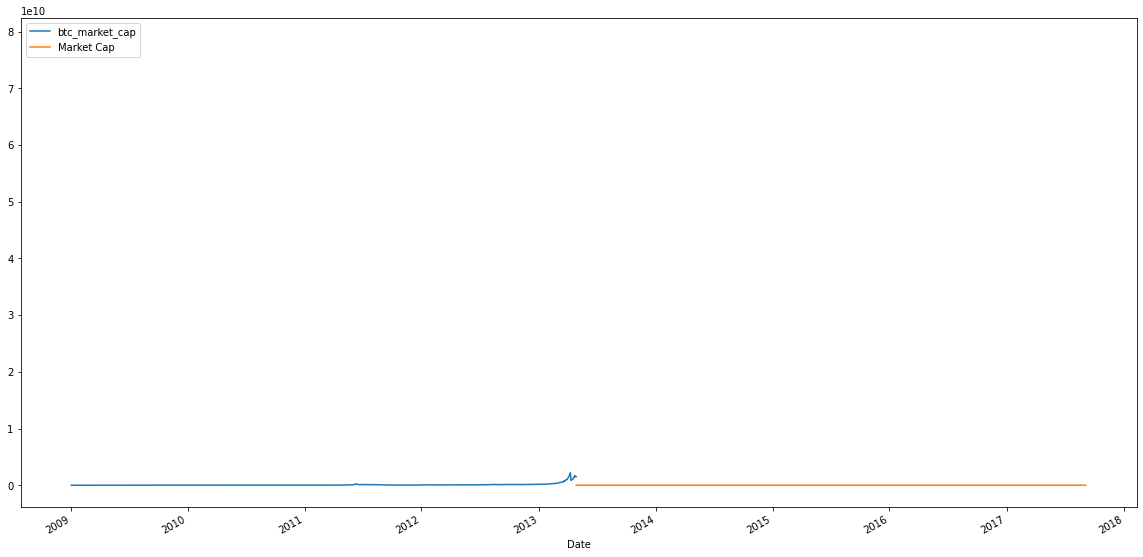

In [23]:
join = dataset.join(price['Market Cap'], how='outer')
join.plot.line( y=['btc_market_cap','Market Cap'], figsize=(20,10))

We can view that this problems we can't solve with data that we have between two files.

Finally, we save a file with datasetfile with revised data.

In [25]:
dataset.to_csv("../data/processed/bitcoin_dataset.csv")







